In [ ]:
import numpy as np
import torchvision
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
import pickle


In [ ]:
loss_train = pickle.load(open('./artifacts/margin-efim-on-train.pkl', 'rb'))
loss_test = pickle.load(open('./artifacts/margin-efim-on-test.pkl', 'rb'))

loss_train = loss_train.cpu().numpy()
loss_test = loss_test.cpu().numpy()
A_centered = loss_train - np.mean(loss_train, axis=0, keepdims=True)
B_centered = loss_test - np.mean(loss_test, axis=0, keepdims=True)
covariance_matrix = (A_centered.T @ B_centered) / (A_centered.shape[0] - 1)

covariance_matrix.shape

cpu cpu


(50000, 10000)

In [15]:
def vis(mat):
    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ds_train = torchvision.datasets.CIFAR10(root='/tmp/cifar/', download=True, train=True)
    ds_val = torchvision.datasets.CIFAR10(root='/tmp/cifar/', download=True, train=False)
    
    for i in range(25):

        fig, axs = plt.subplots(nrows=2, ncols=11, figsize=(20, 6))
        fig.suptitle('Top and Bottom scoring TRAK images from the train set')
        
        # Plot the target image
        target_img, target_label = ds_val[i]
        axs[0, 0].imshow(target_img)
        axs[0, 0].axis('off')
        axs[0, 0].set_title(f'Target: {classes[target_label]}')
        
        axs[1, 0].axis('off')
        
        # Get the top 10 and bottom 10 scoring train image indices and their scores
        top_trak_scorers = mat[:, i].argsort()[-10:][::-1]
        top_trak_scores = mat[top_trak_scorers, i]
        
        bottom_trak_scorers = mat[:, i].argsort()[:10]
        bottom_trak_scores = mat[bottom_trak_scorers, i]

        # Plot the top 10 scoring train images and annotate with scores and labels
        for ii, (train_im_ind, score) in enumerate(zip(top_trak_scorers, top_trak_scores)):
            img, label = ds_train[train_im_ind]
            axs[0, ii + 1].imshow(img)
            axs[0, ii + 1].axis('off')
            axs[0, ii + 1].set_title(f'{classes[label]}\nScore: {score:.2f}')

        # Plot the bottom 10 scoring train images and annotate with scores and labels
        for ii, (train_im_ind, score) in enumerate(zip(bottom_trak_scorers, bottom_trak_scores)):
            img, label = ds_train[train_im_ind]
            axs[1, ii + 1].imshow(img)
            axs[1, ii + 1].axis('off')
            axs[1, ii + 1].set_title(f'{classes[label]}\nScore: {score:.2f}')

        fig.tight_layout()
        plt.show()


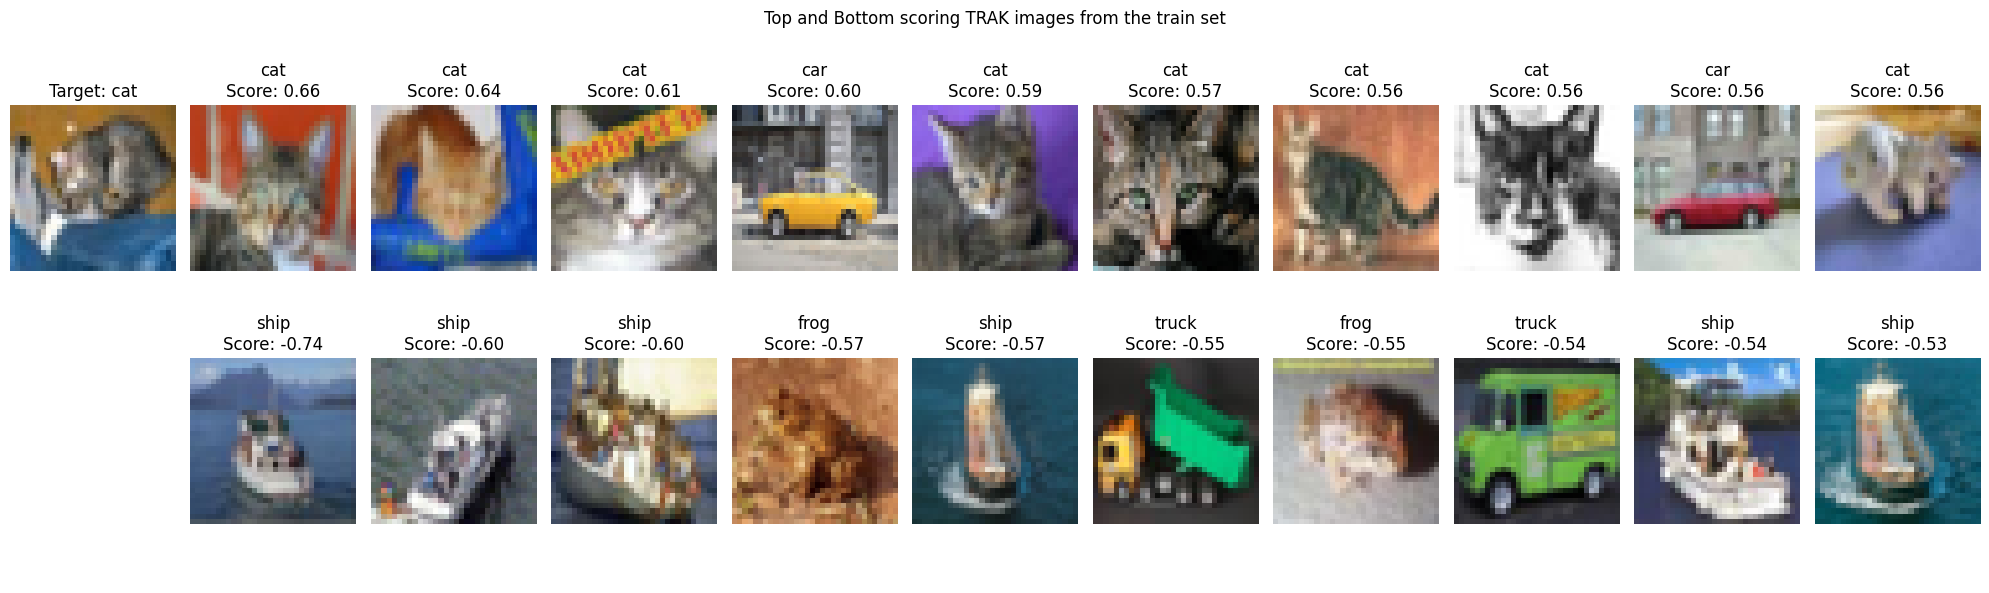

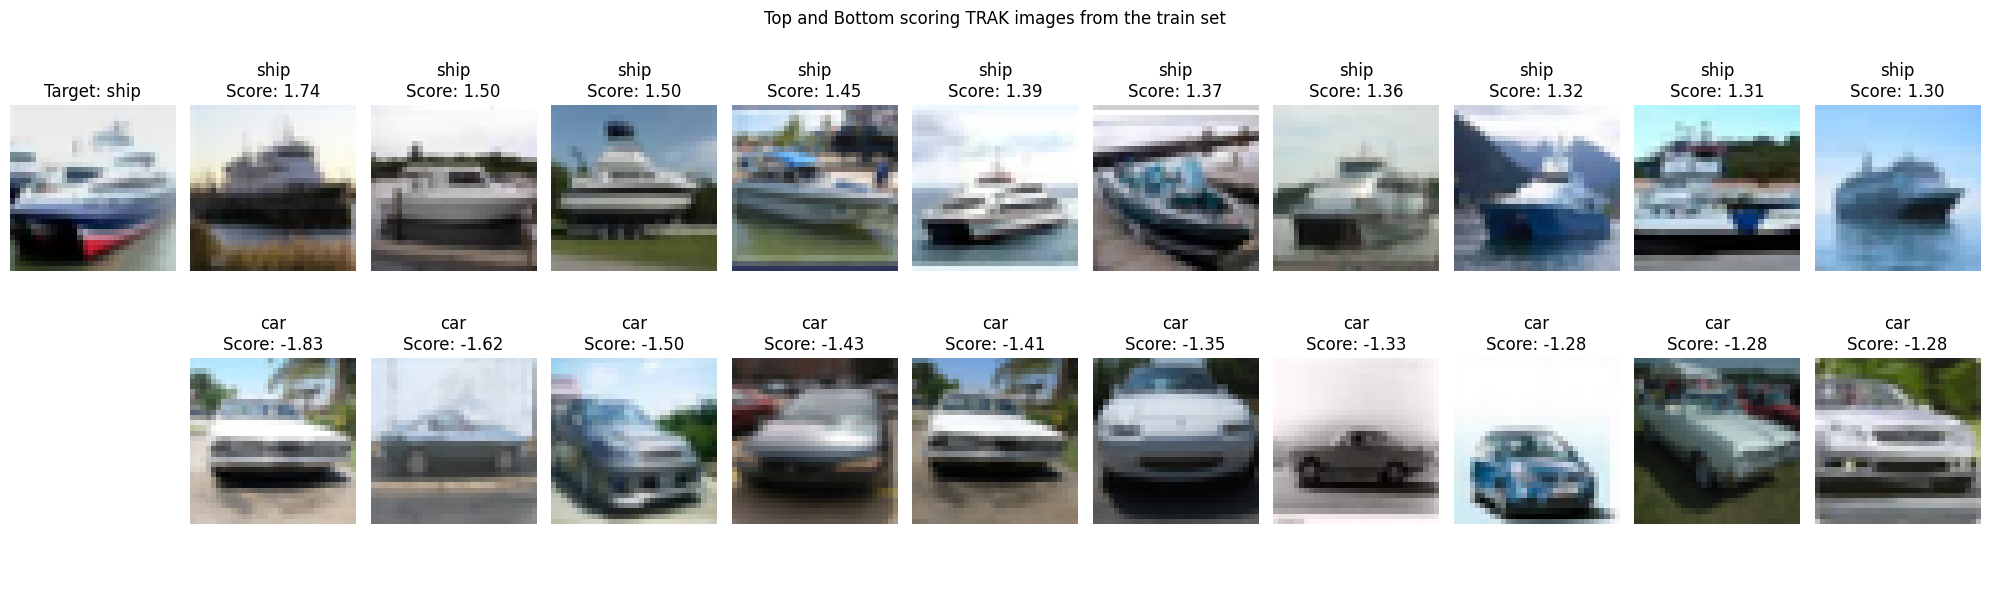

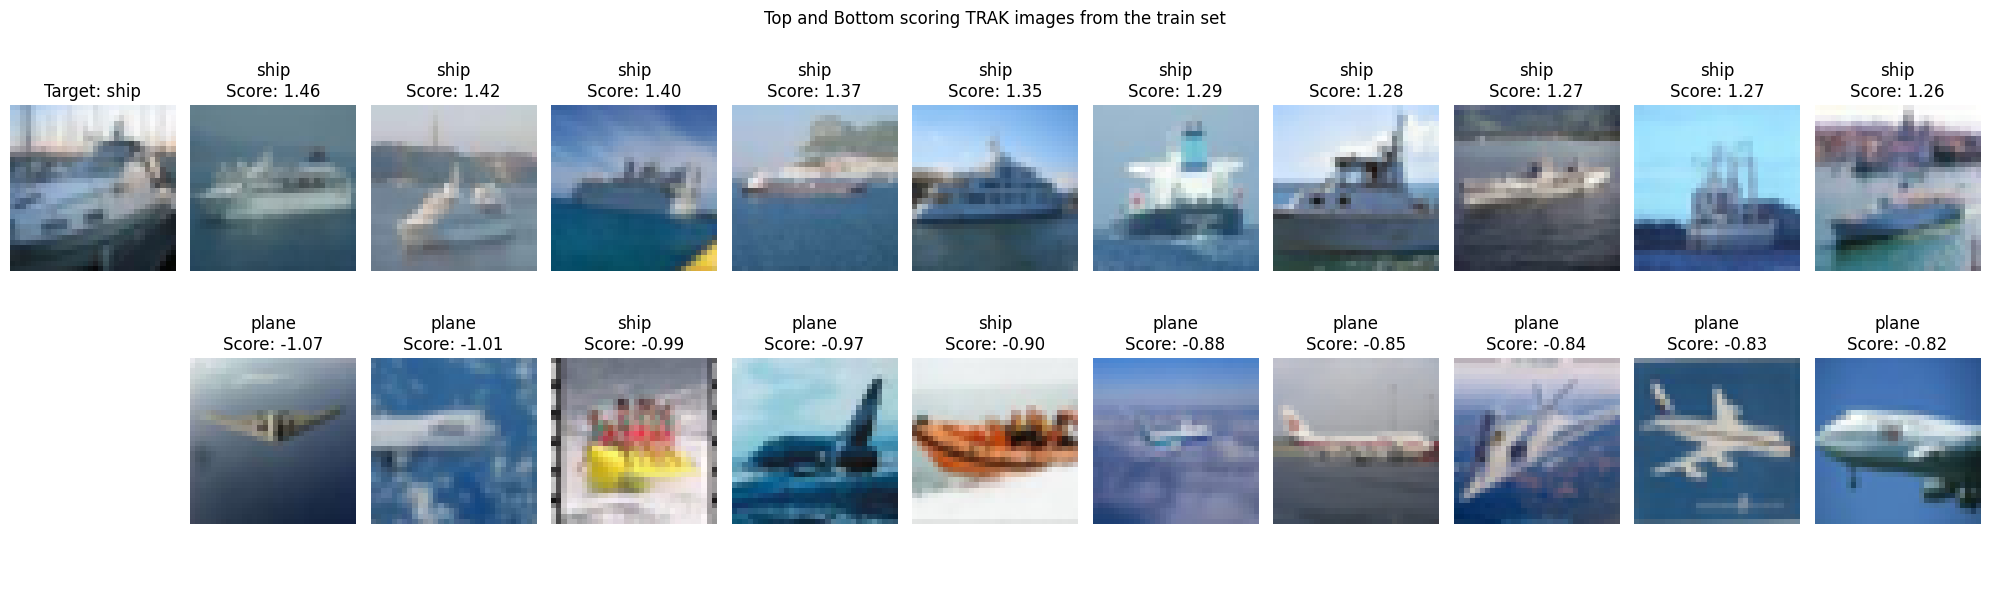

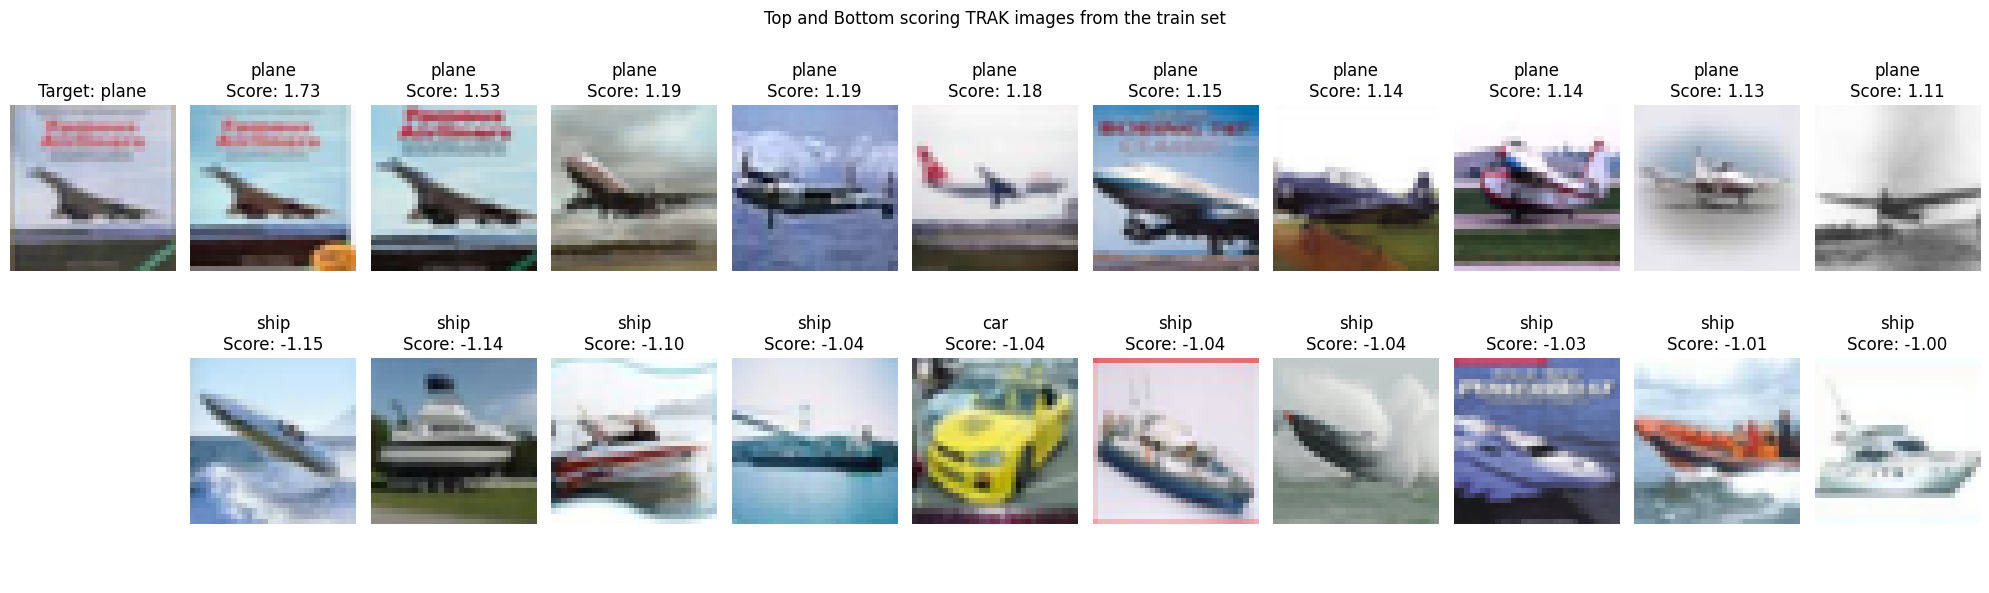

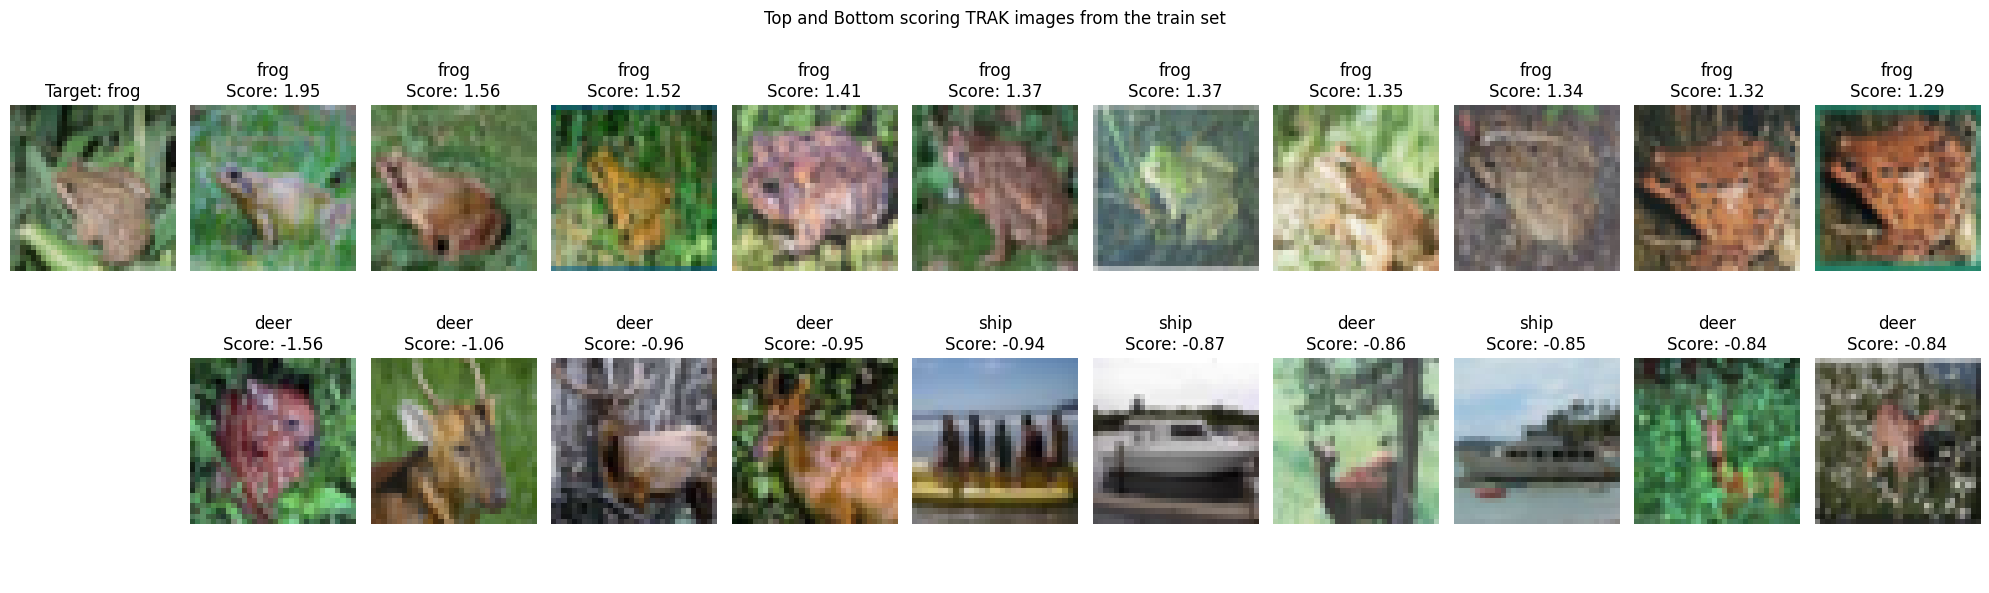

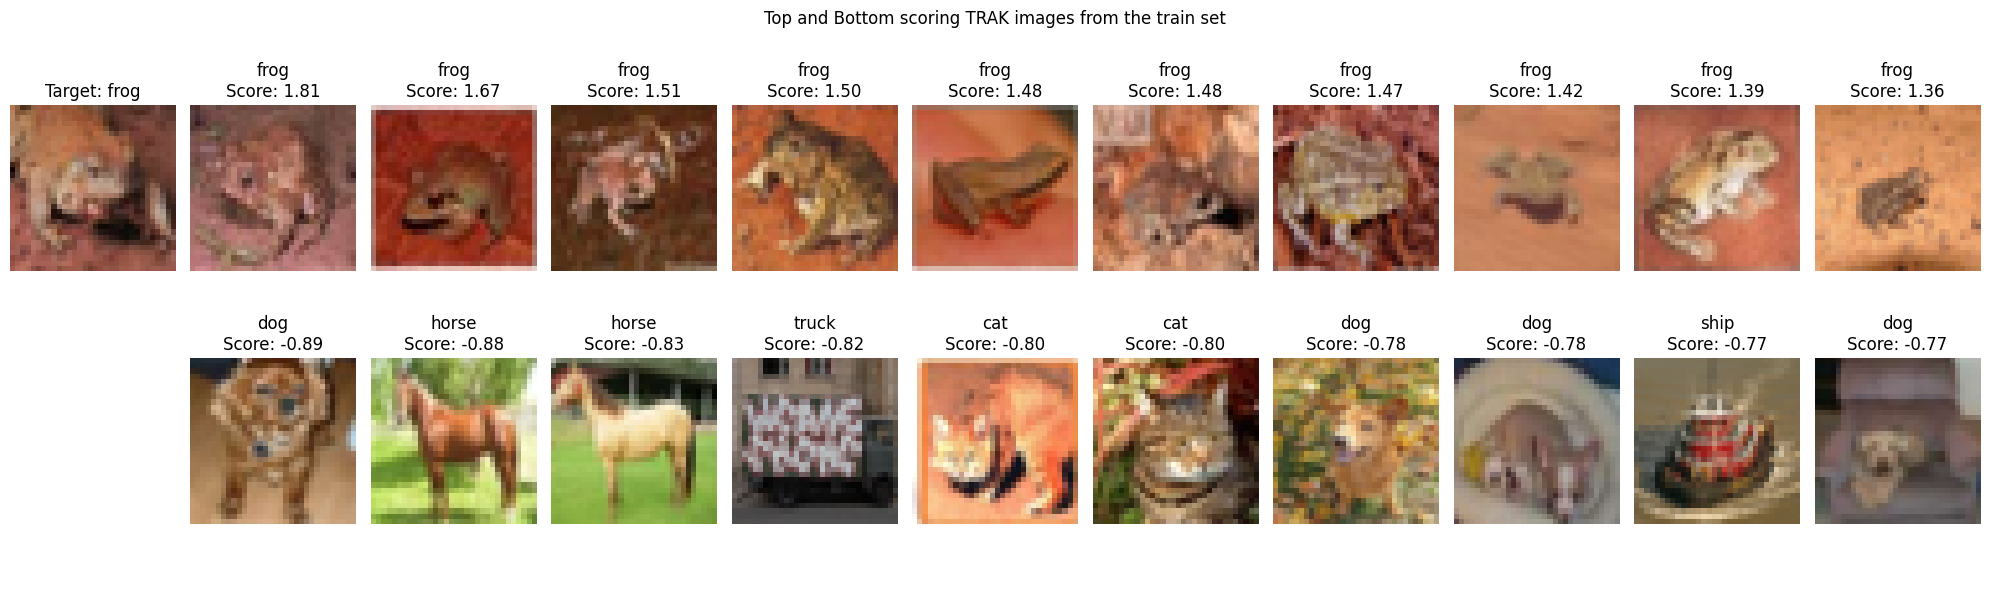

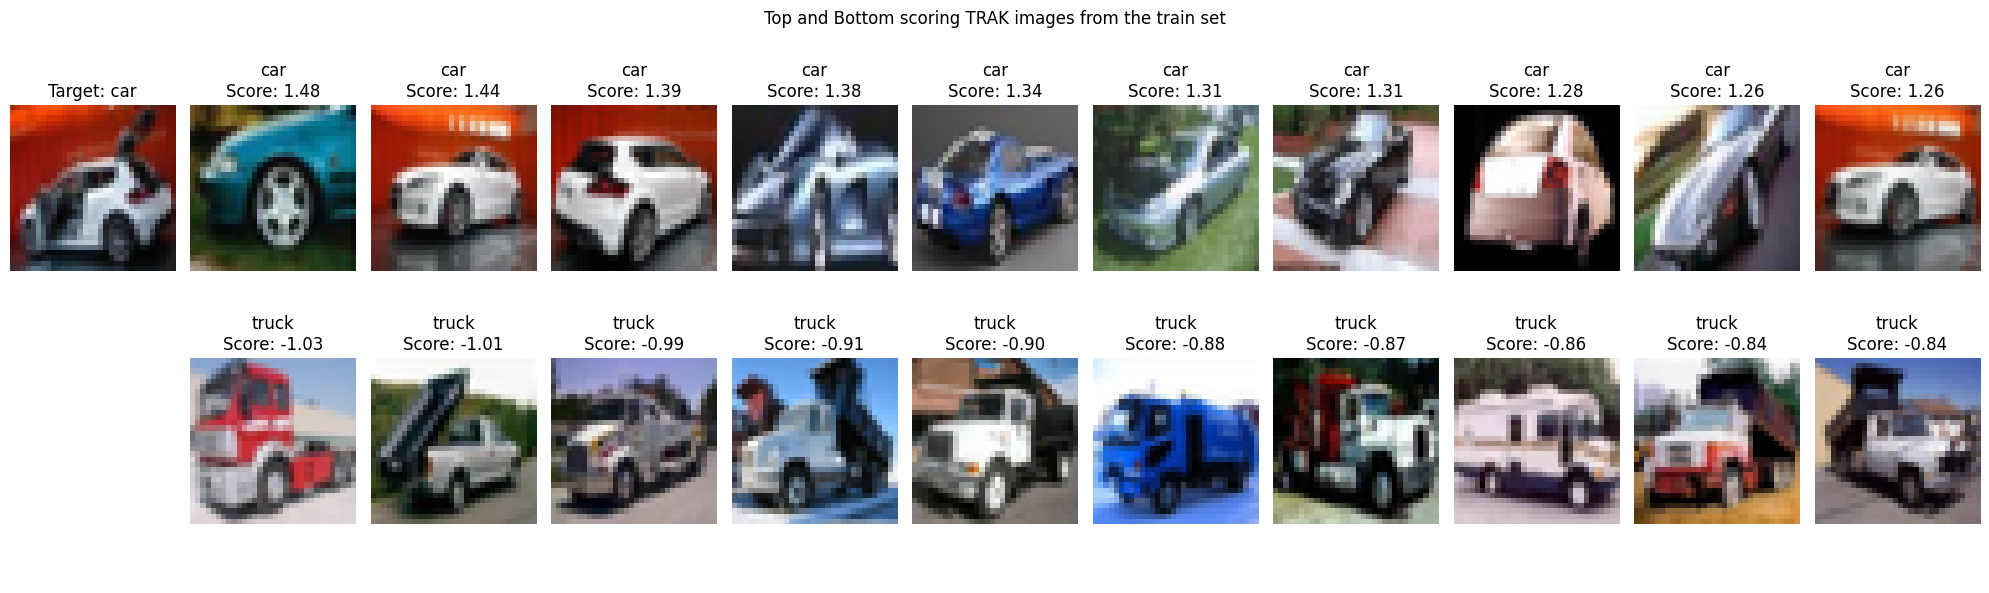

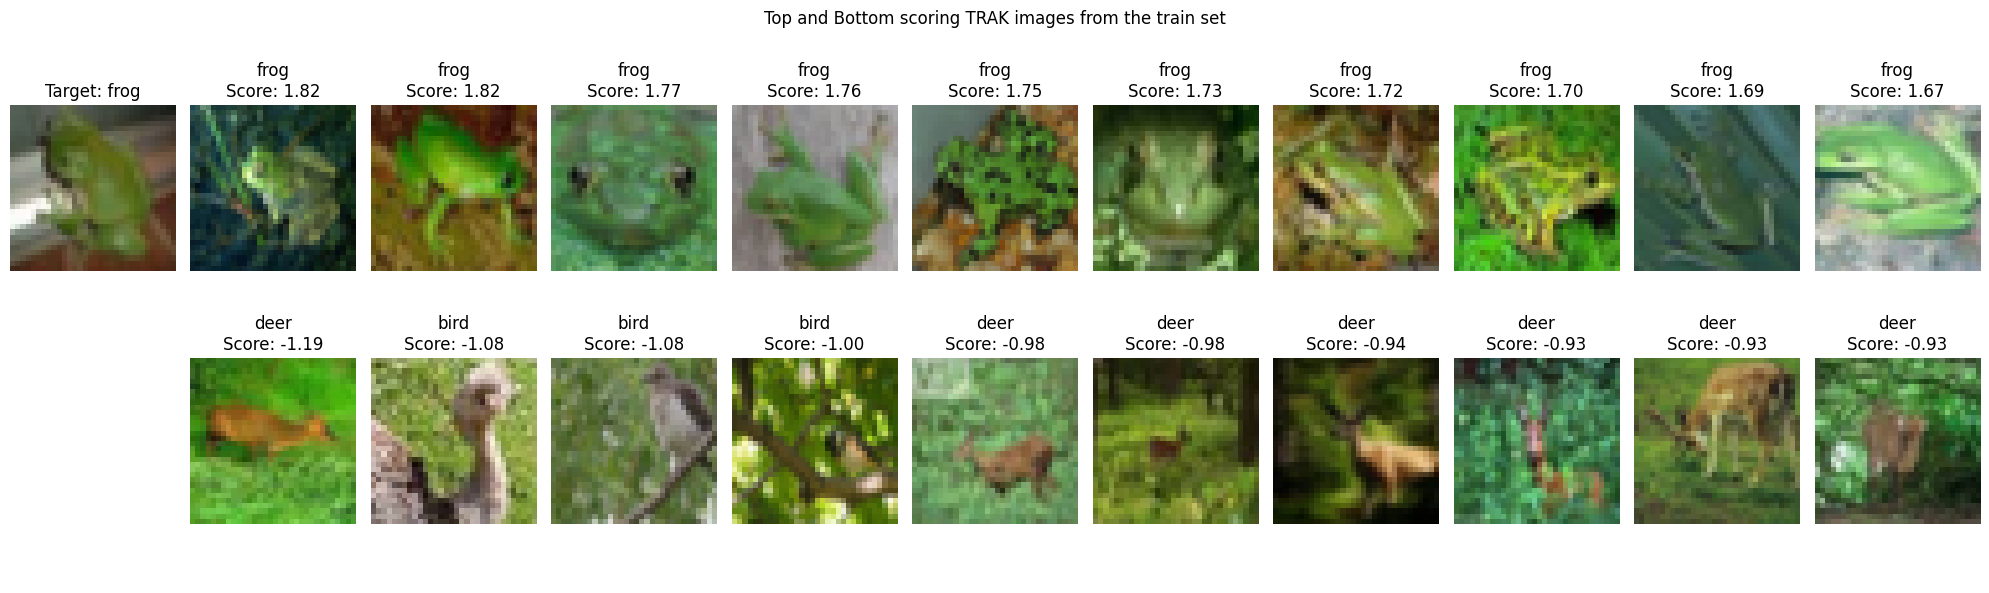

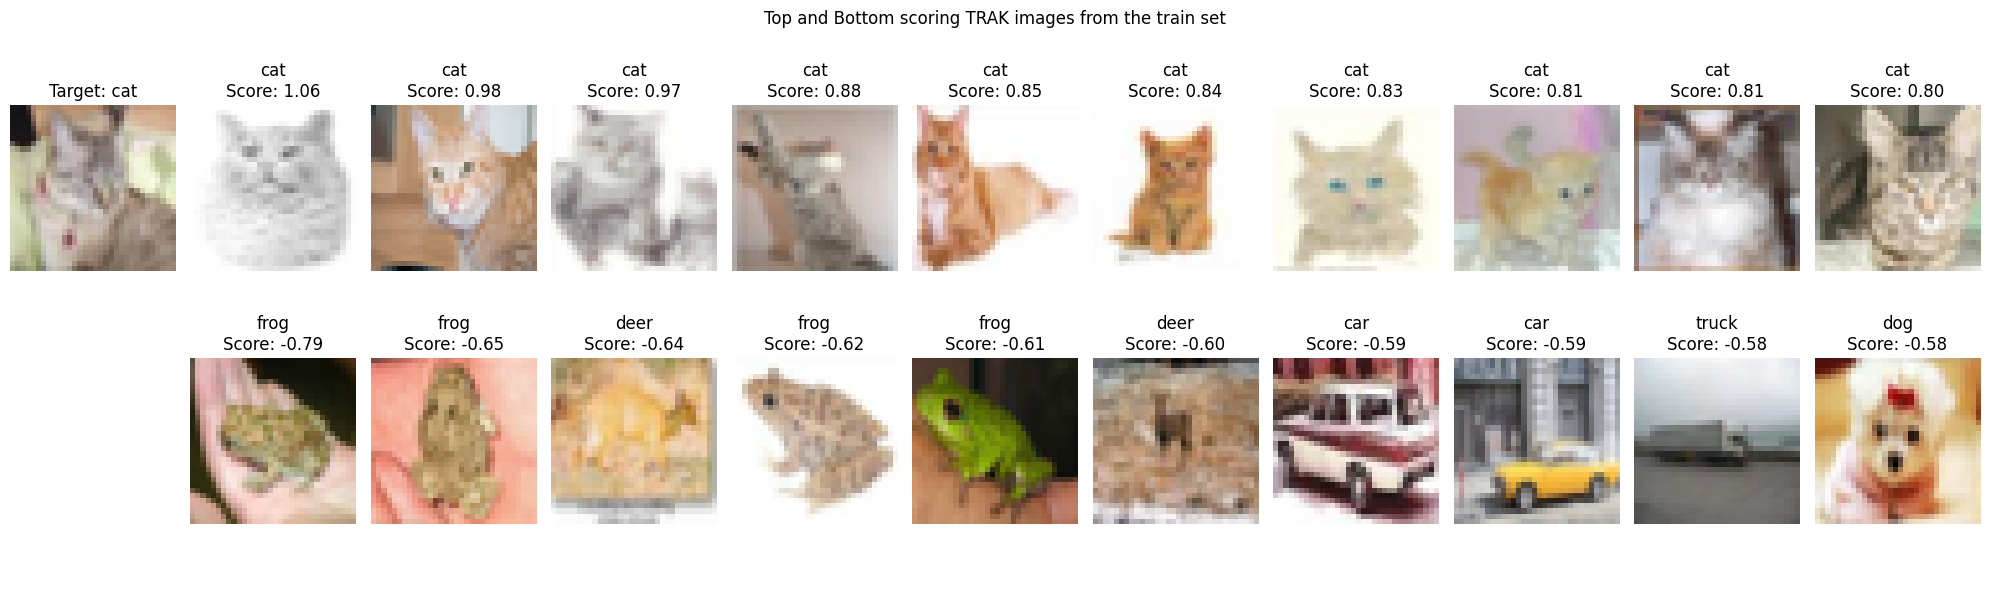

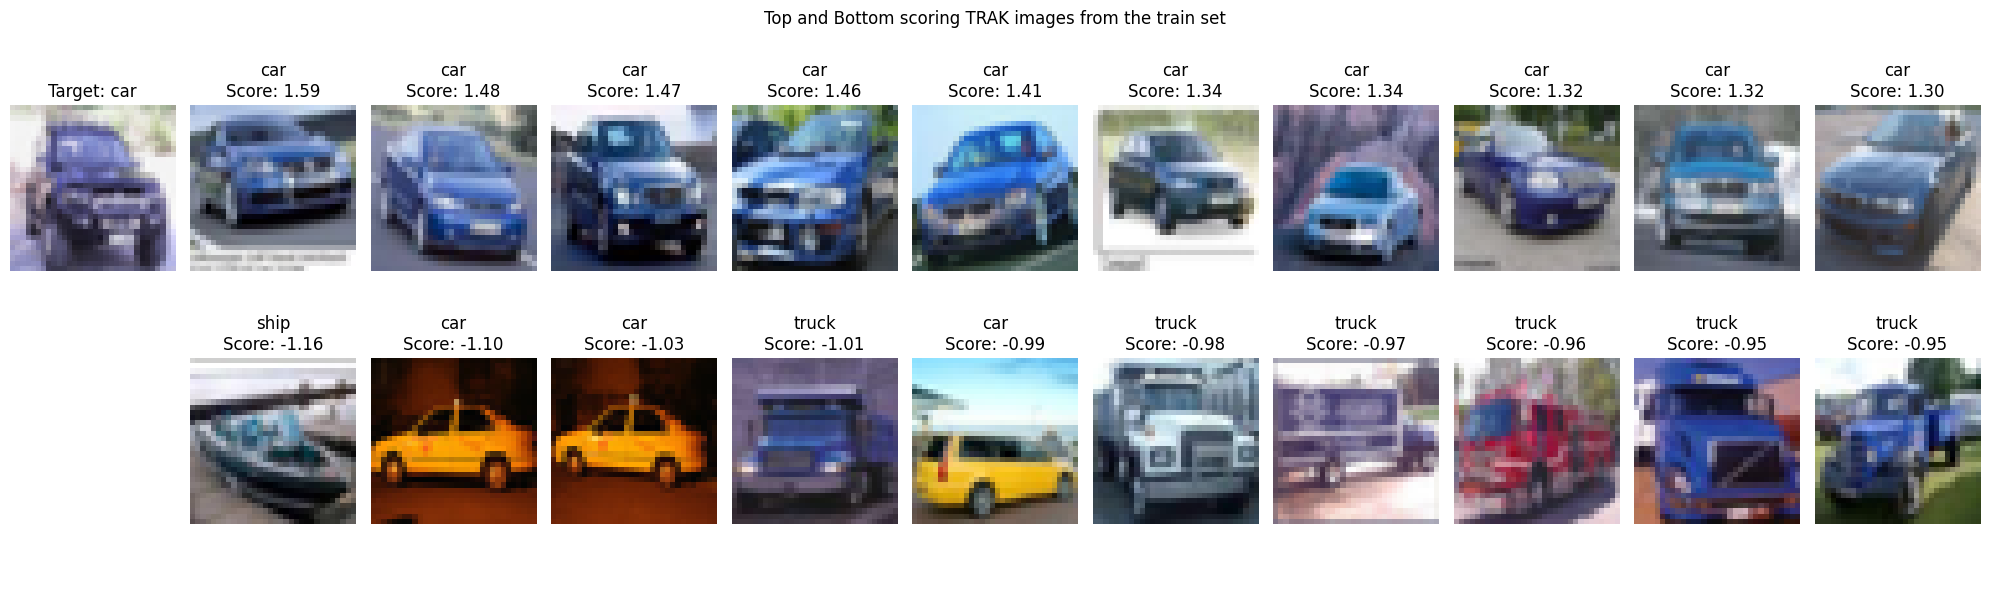

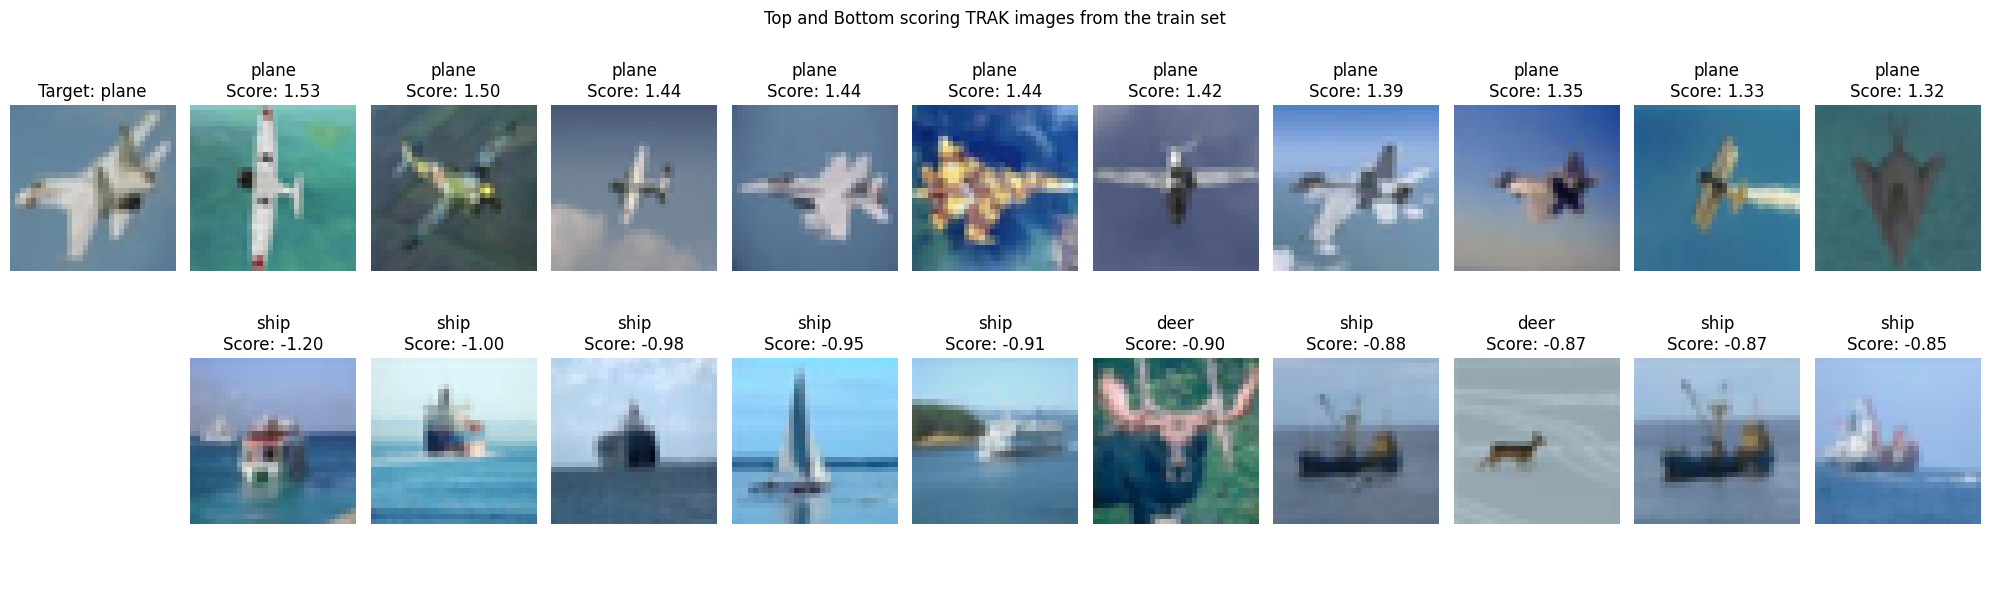

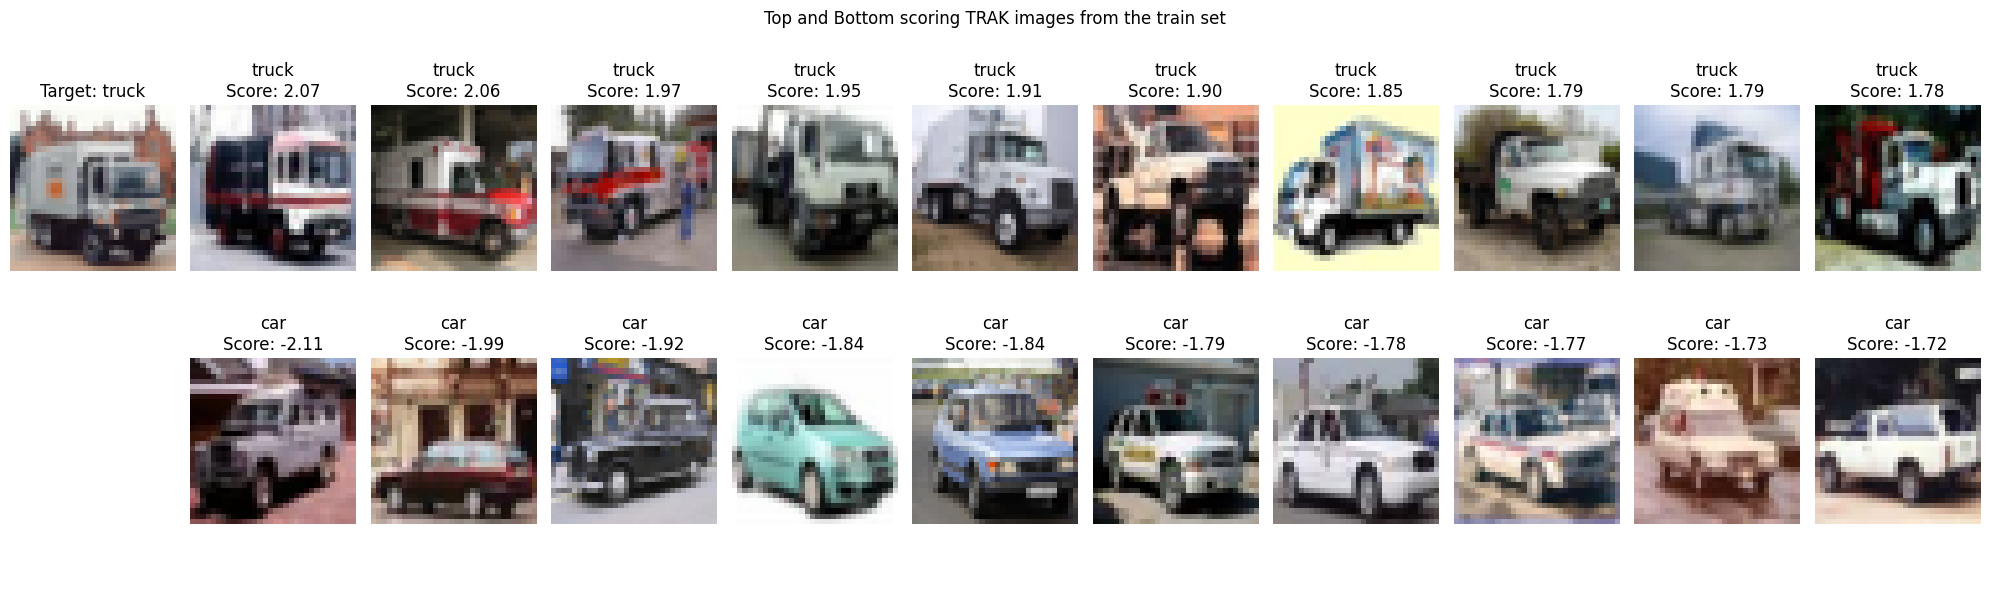

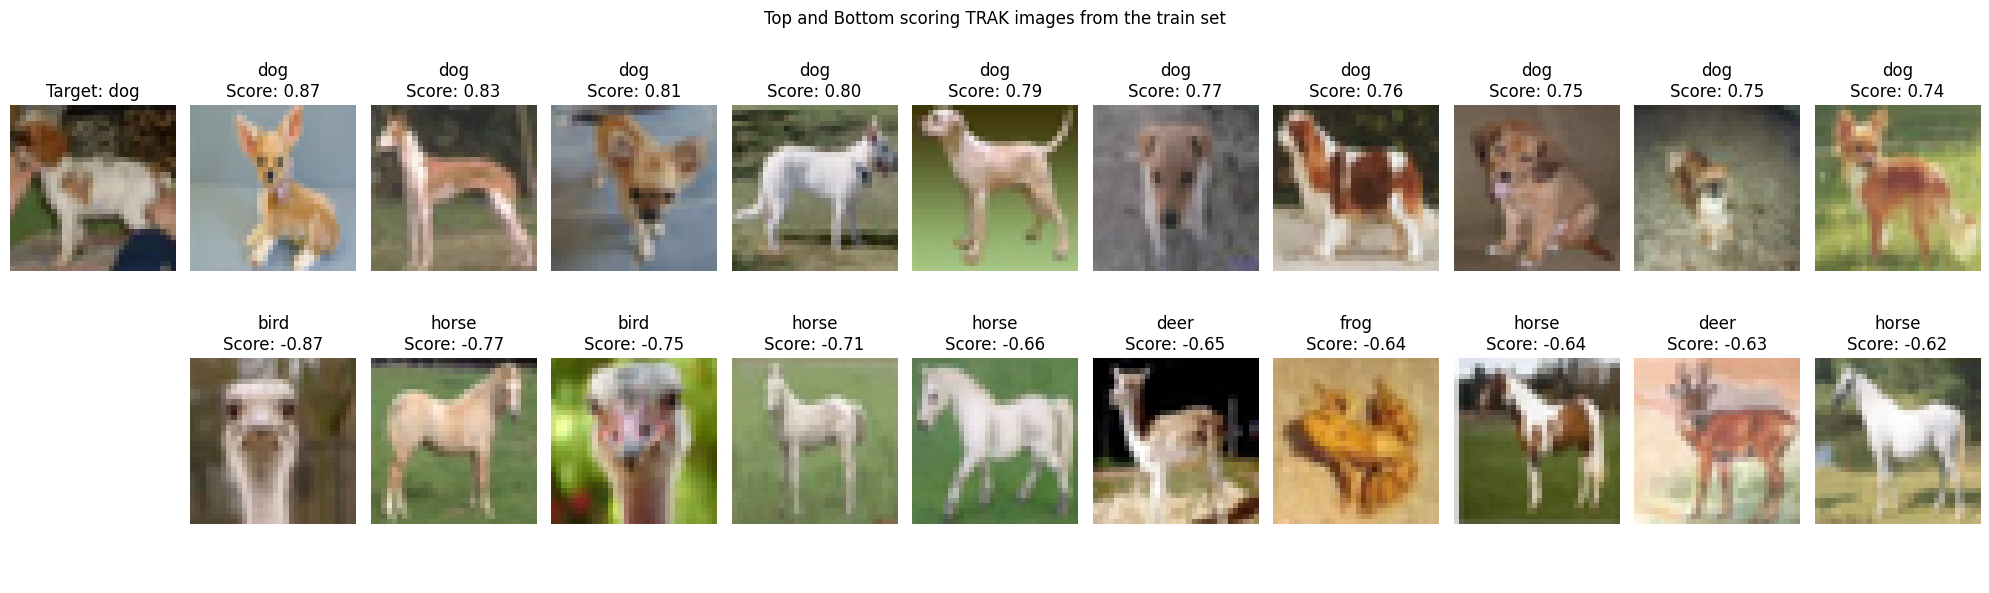

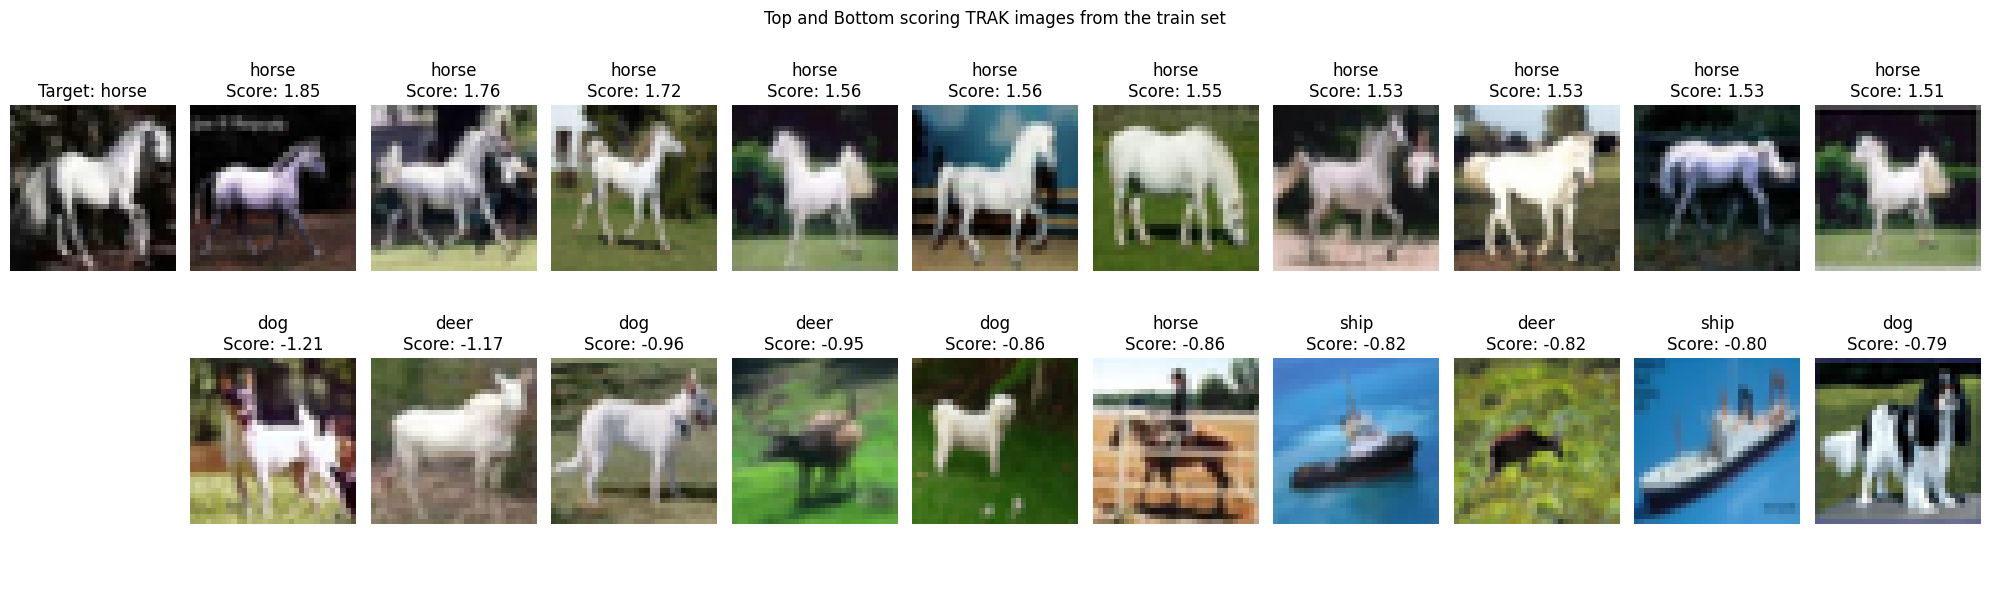

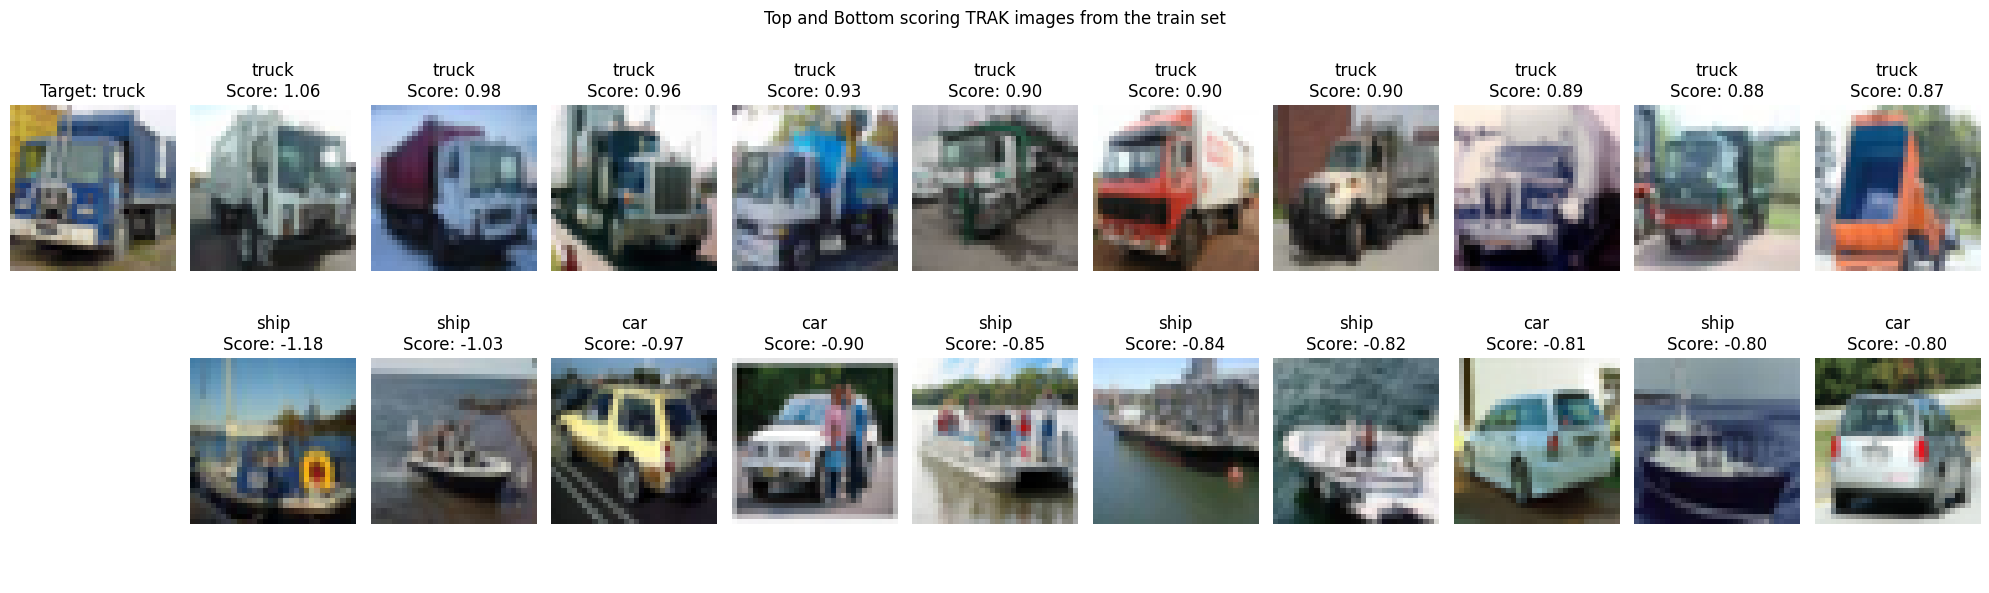

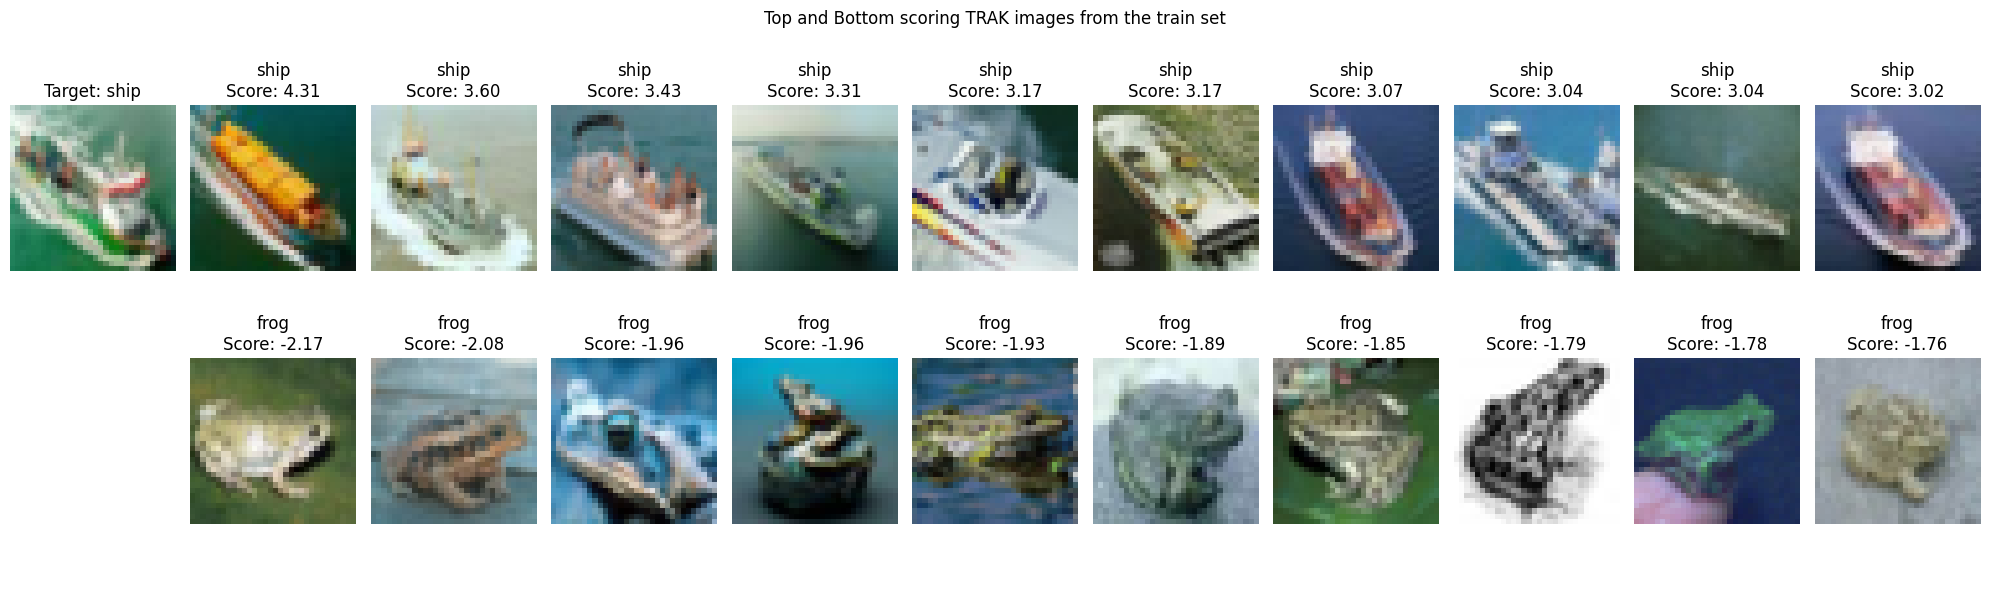

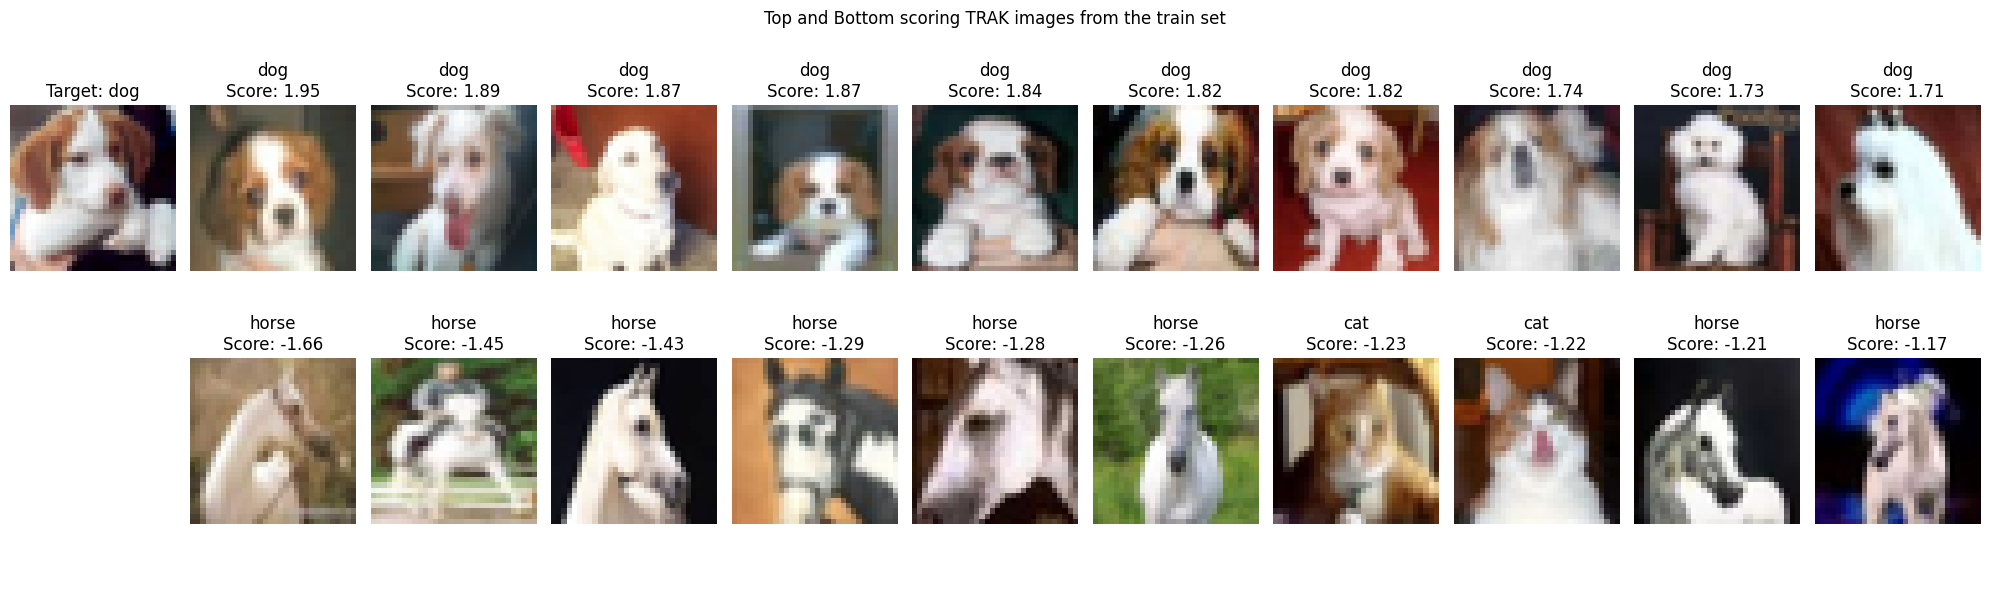

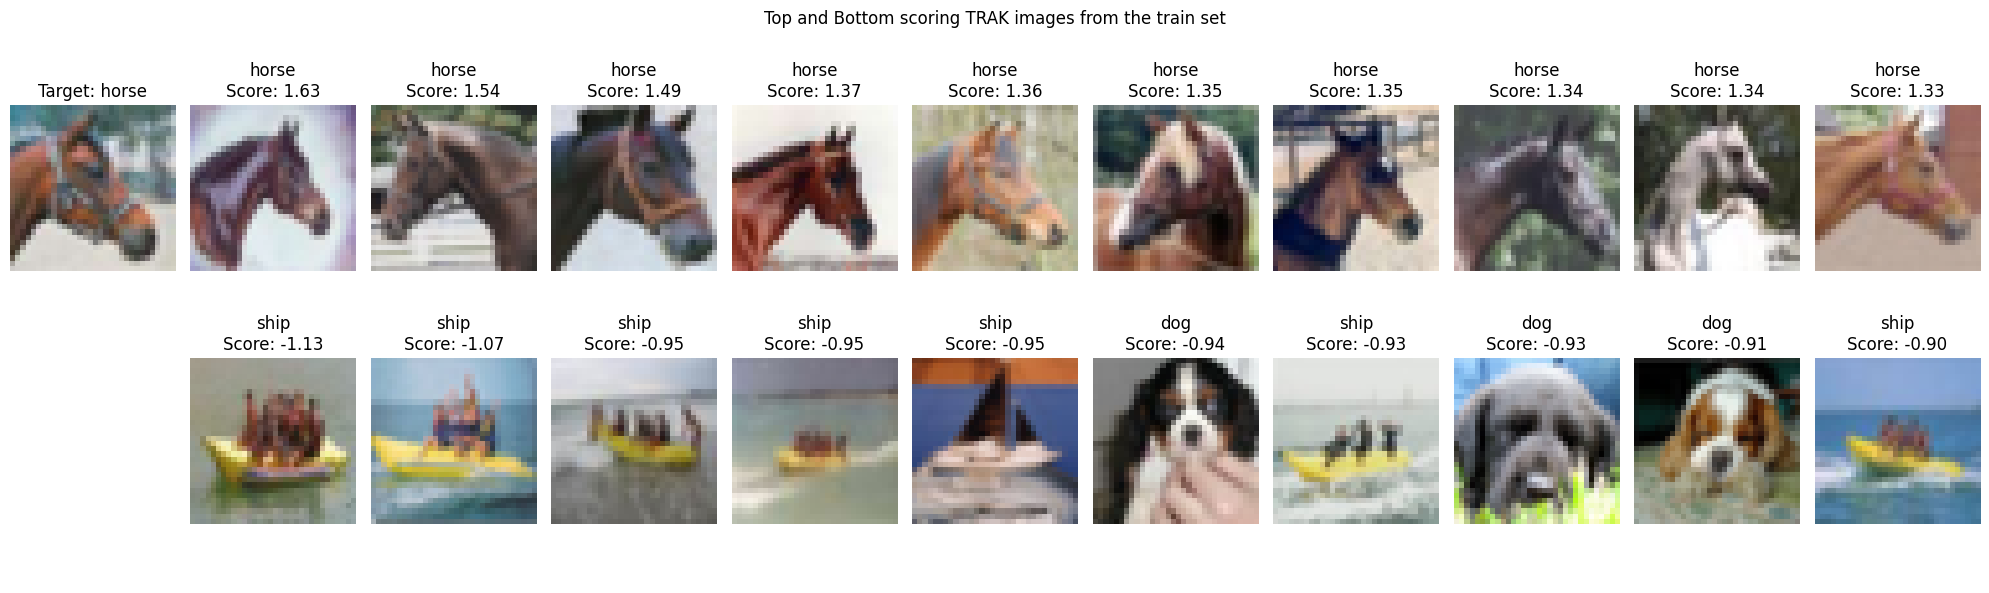

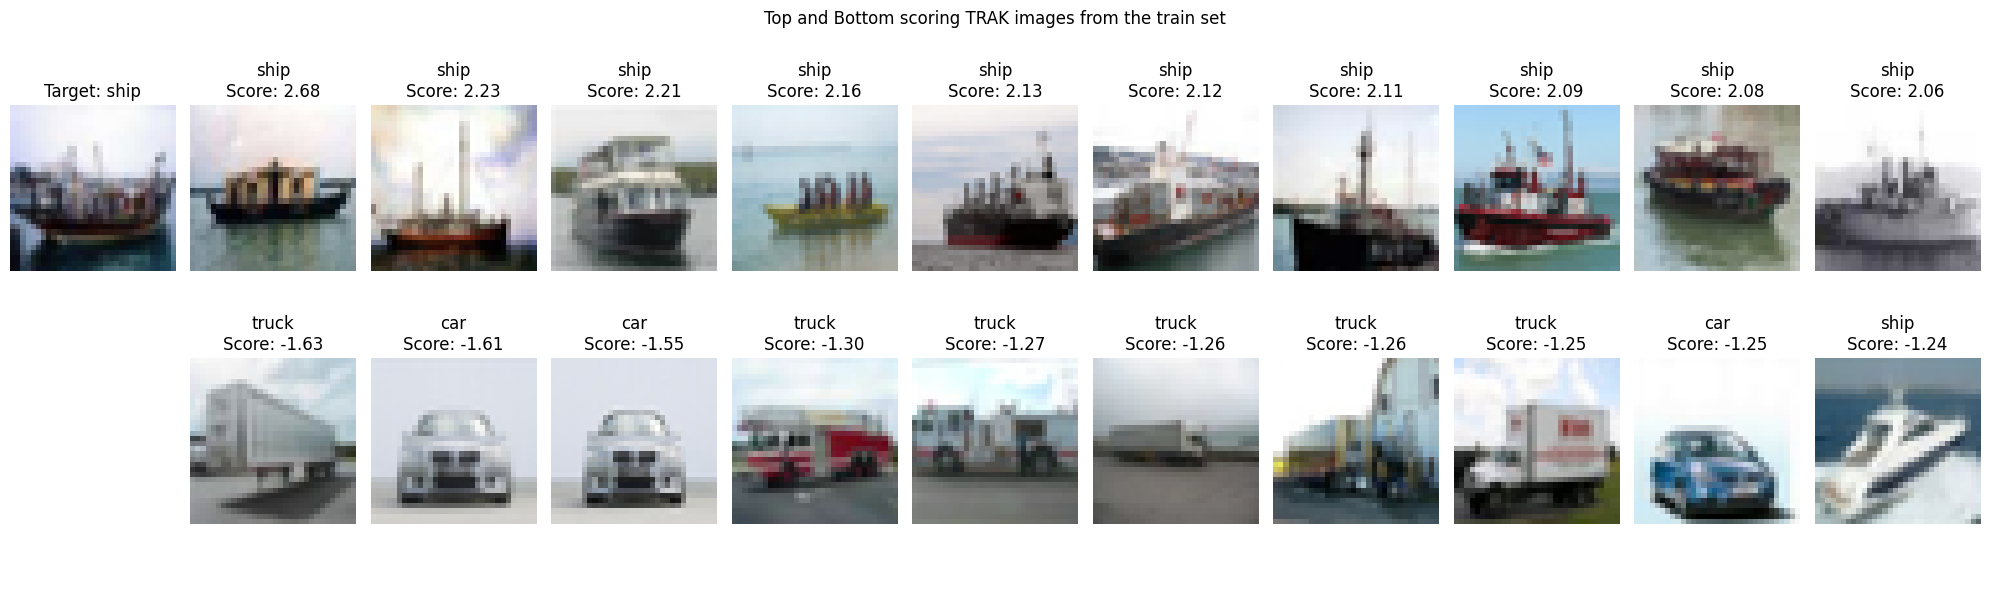

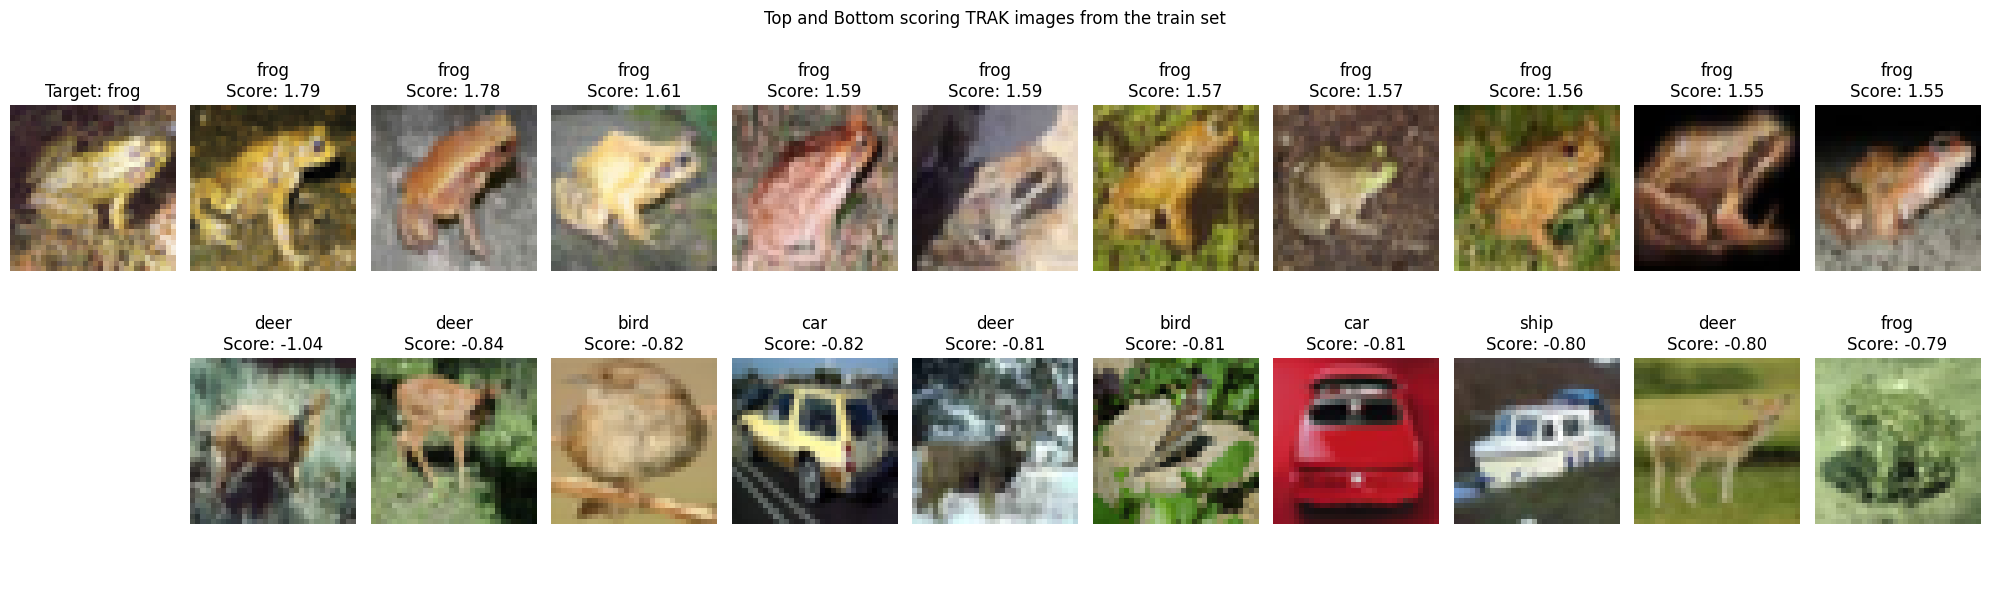

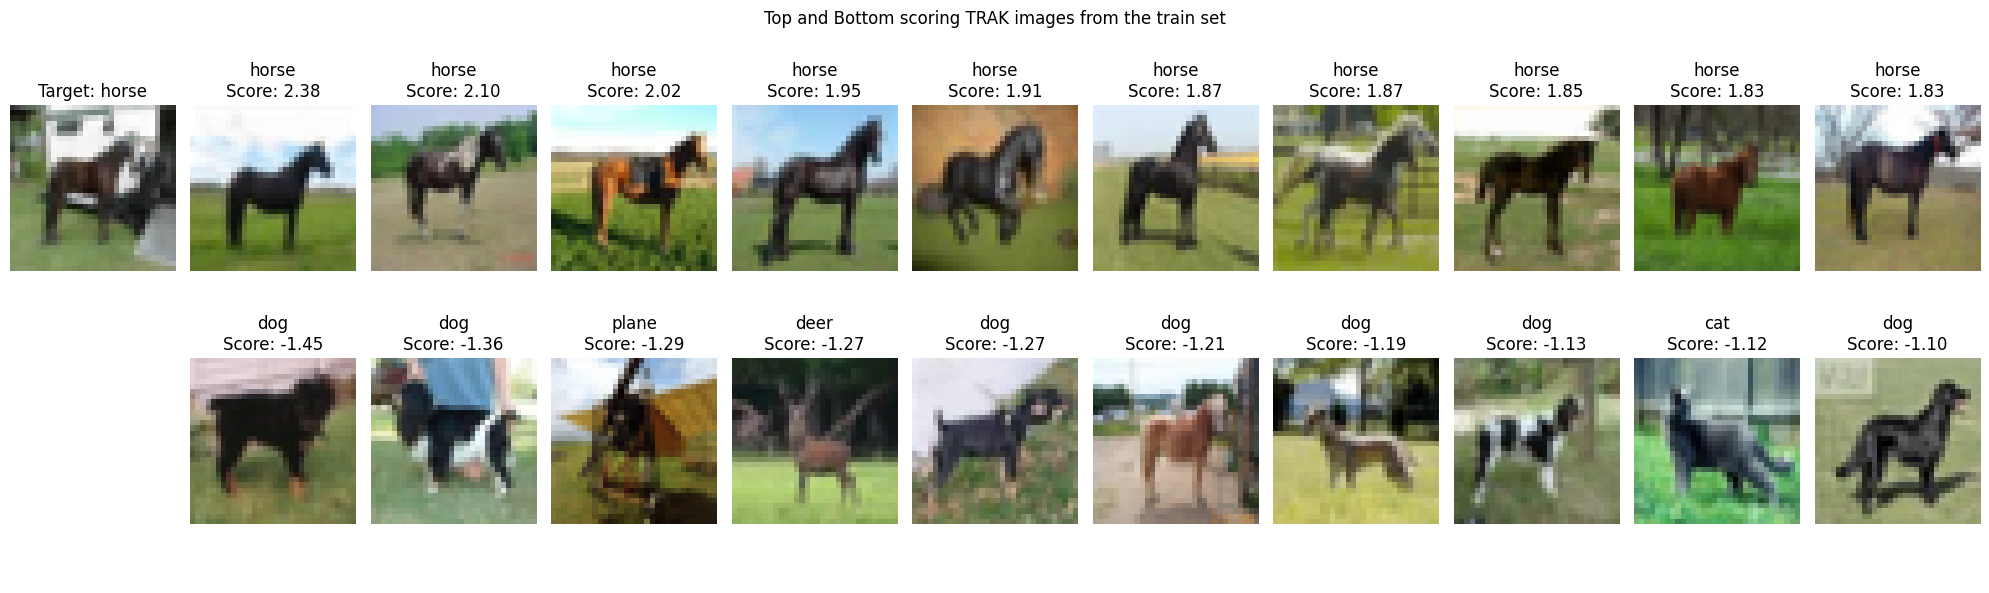

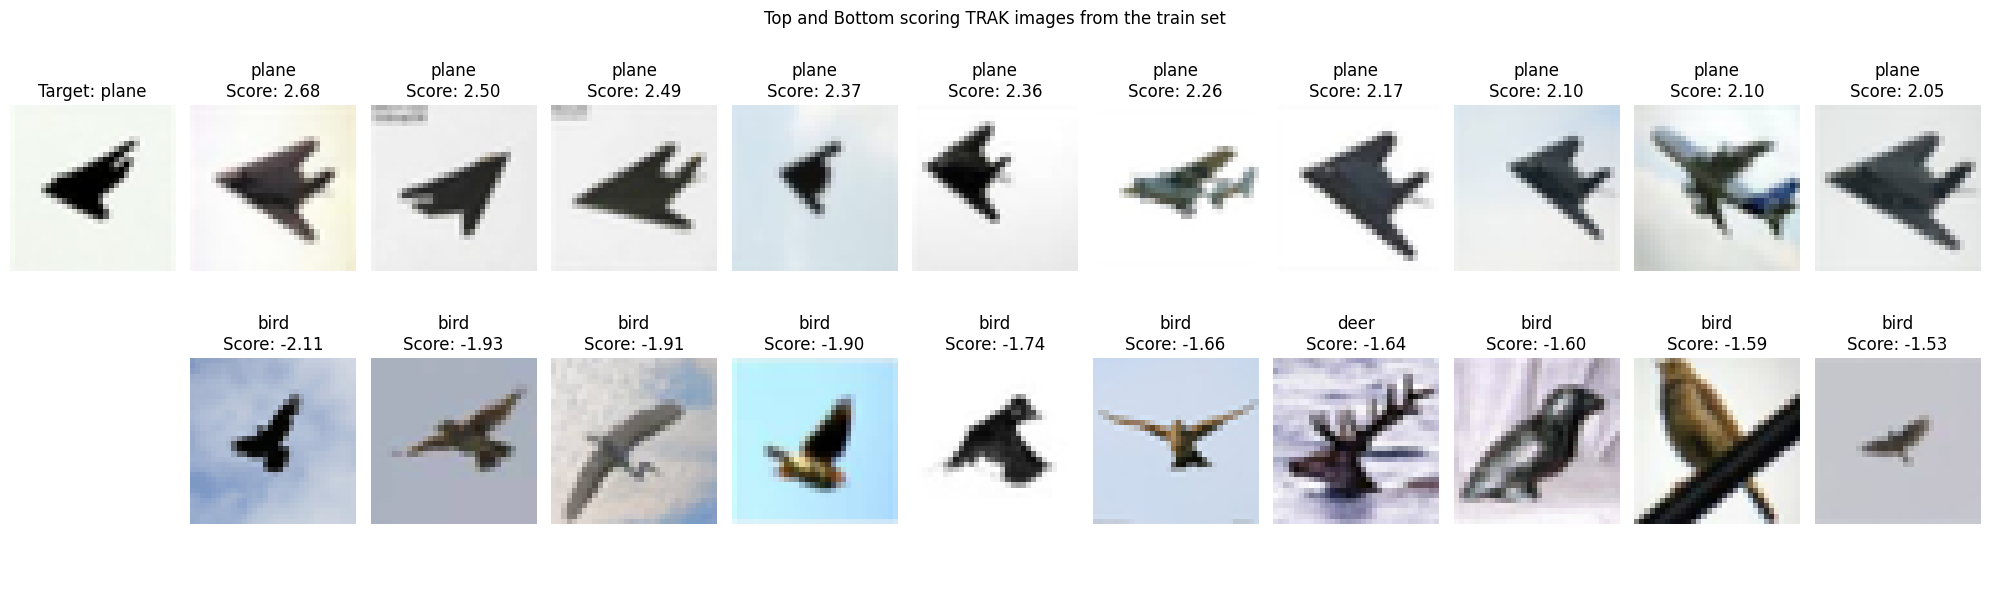

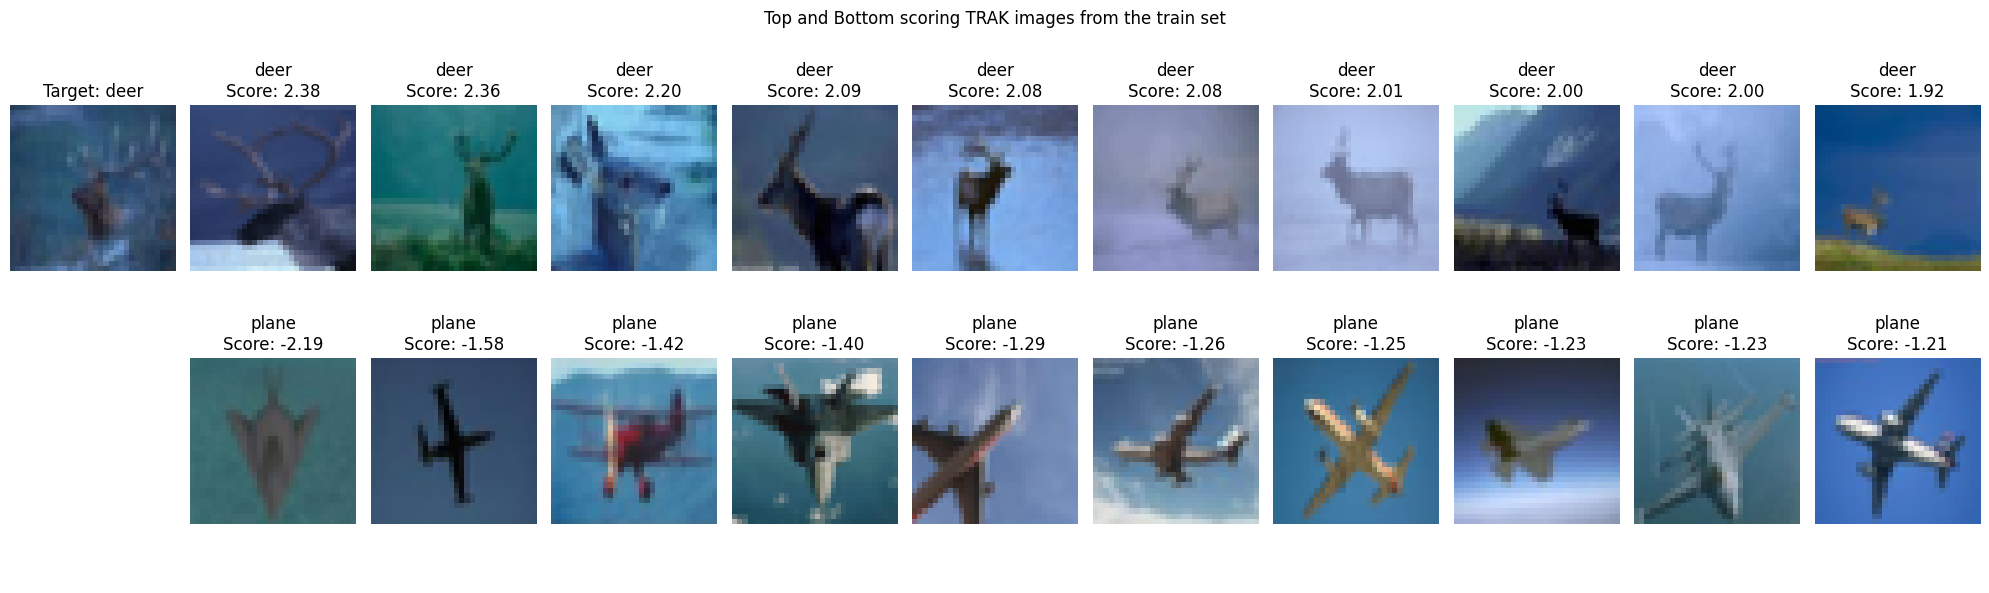

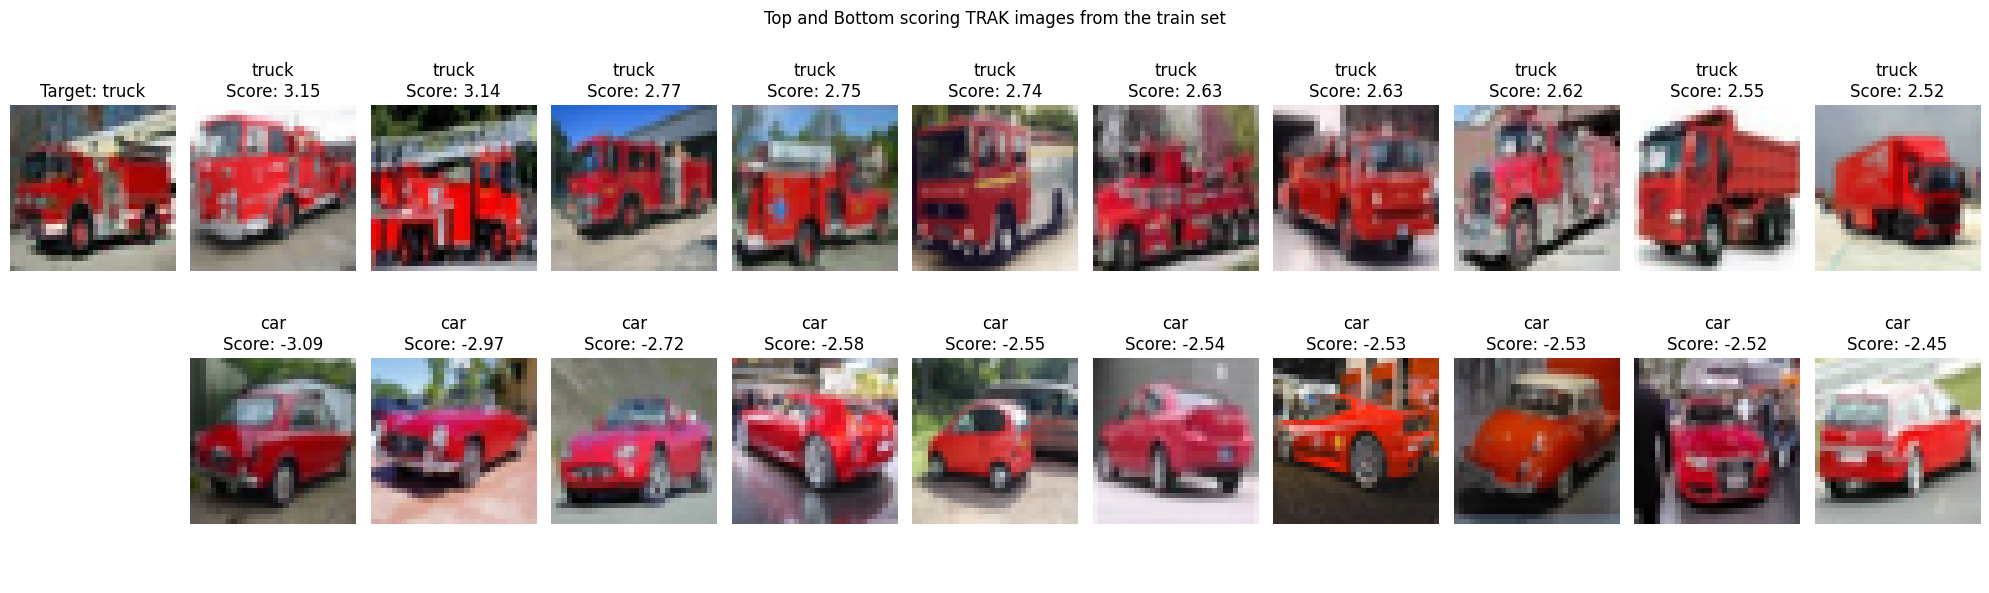

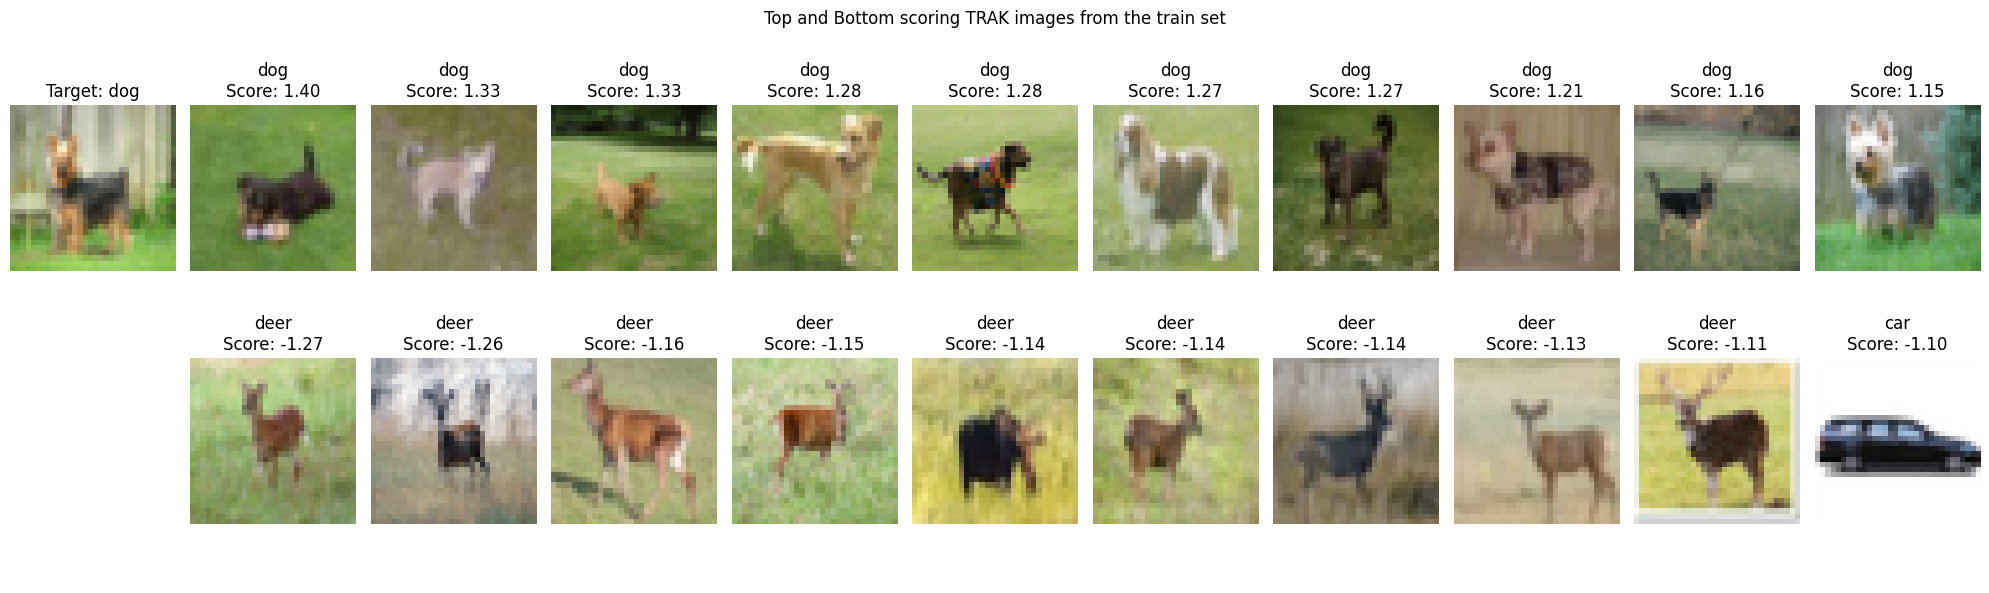

In [16]:
vis(covariance_matrix)